# ANALAYSE DES VENTES DE LA SOCIETE "LA PAGE"

## Analyse des différents indicateurs de ventes autour du chiffre d'affaire

### Importation des librairie et importation des fichiers

In [1]:
#Importation des différentes librairies
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

In [2]:
#Import CSV
customers = pd.read_csv(r'C:\Users\chouh\Projet 9\customers.csv', delimiter=';')
products = pd.read_csv(r'C:\Users\chouh\Projet 9\products.csv', delimiter=';')
transactions = pd.read_csv(r'C:\Users\chouh\Projet 9\Transactions.csv', delimiter=';', low_memory=False)

### Néttoyage et transformation des données

### Fichier customers

In [3]:
#Afficher le dataset 
print(customers.shape)
print('Le dataframe du fichier customers contient 3 colonnes et 8621 lignes')

(8621, 3)
Le dataframe du fichier customers contient 3 colonnes et 8621 lignes


In [4]:
#head
customers.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [5]:
#Recherche de doublons
doublons_customers = customers.duplicated()
print('Il y a ' + str(doublons_customers.sum()) + ' doublons dans notre dataframe.')

Il y a 0 doublons dans notre dataframe.


### Fichier products

In [6]:
#Afficher le dataset 
print(products.shape)
print('Le dataframe du fichier products contient 3 colonnes et 3286 lignes')

(3286, 3)
Le dataframe du fichier products contient 3 colonnes et 3286 lignes


In [7]:
#head
products.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [8]:
#Recherche de doublons
doublons_products = products.duplicated()
print('Il y a ' + str(doublons_products.sum()) + ' doublons dans notre dataframe.')

Il y a 0 doublons dans notre dataframe.


### Fichier transactions

In [9]:
#Afficher le dataset 
print(transactions.shape)
print('Le dataframe du fichier transactions contient 4 colonnes et 1048575 lignes')

(1048575, 4)
Le dataframe du fichier transactions contient 4 colonnes et 1048575 lignes


In [10]:
#Recherche de doublons
doublons_transactions = transactions.duplicated()
print('Il y a ' + str(doublons_transactions.sum()) + ' doublons dans notre dataframe.')

Il y a 361040 doublons dans notre dataframe.


In [11]:
#Suppresssion des doublons
transactions = transactions.drop_duplicates()

In [12]:
#Suppression des lignes vide
transactions = transactions.dropna(how='all')
transactions

id_prod                        date session_id client_id
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329
1       0_1390  2021-03-01 00:02:26.047414        s_2     c_664
2       0_1352  2021-03-01 00:02:38.311413        s_3     c_580
3       0_1458  2021-03-01 00:04:54.559692        s_4    c_7912
4       0_1358  2021-03-01 00:05:18.801198        s_5    c_2033
...        ...                         ...        ...       ...
687529   1_508  2023-02-28 23:49:03.148402   s_348444    c_3573
687530    2_37  2023-02-28 23:51:29.318531   s_348445      c_50
687531   1_695  2023-02-28 23:53:18.929676   s_348446     c_488
687532  0_1547  2023-02-28 23:58:00.107815   s_348447    c_4848
687533  0_1398  2023-02-28 23:58:30.792755   s_348435    c_3575

[687534 rows x 4 columns]

### Jointure entre nos 3 fichiers

In [13]:
# Jointure entre transaction et customers avec client_id
first_merge = pd.merge(transactions, customers, on='client_id', how='left')
first_merge

id_prod                        date session_id client_id sex  birth
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329   f   1967
1       0_1390  2021-03-01 00:02:26.047414        s_2     c_664   m   1960
2       0_1352  2021-03-01 00:02:38.311413        s_3     c_580   m   1988
3       0_1458  2021-03-01 00:04:54.559692        s_4    c_7912   f   1989
4       0_1358  2021-03-01 00:05:18.801198        s_5    c_2033   f   1956
...        ...                         ...        ...       ...  ..    ...
687529   1_508  2023-02-28 23:49:03.148402   s_348444    c_3573   f   1996
687530    2_37  2023-02-28 23:51:29.318531   s_348445      c_50   f   1994
687531   1_695  2023-02-28 23:53:18.929676   s_348446     c_488   f   1985
687532  0_1547  2023-02-28 23:58:00.107815   s_348447    c_4848   m   1953
687533  0_1398  2023-02-28 23:58:30.792755   s_348435    c_3575   f   1981

[687534 rows x 6 columns]

In [14]:
# Jointure en first_merge et products avec id_prod
df_merge = pd.merge(first_merge, products, on='id_prod', how='left')
df_merge

id_prod                        date session_id client_id sex  birth  \
0       0_1259  2021-03-01 00:01:07.843138        s_1     c_329   f   1967   
1       0_1390  2021-03-01 00:02:26.047414        s_2     c_664   m   1960   
2       0_1352  2021-03-01 00:02:38.311413        s_3     c_580   m   1988   
3       0_1458  2021-03-01 00:04:54.559692        s_4    c_7912   f   1989   
4       0_1358  2021-03-01 00:05:18.801198        s_5    c_2033   f   1956   
...        ...                         ...        ...       ...  ..    ...   
687529   1_508  2023-02-28 23:49:03.148402   s_348444    c_3573   f   1996   
687530    2_37  2023-02-28 23:51:29.318531   s_348445      c_50   f   1994   
687531   1_695  2023-02-28 23:53:18.929676   s_348446     c_488   f   1985   
687532  0_1547  2023-02-28 23:58:00.107815   s_348447    c_4848   m   1953   
687533  0_1398  2023-02-28 23:58:30.792755   s_348435    c_3575   f   1981   

        price  categ  
0       11.99      0  
1       19.37      0  
2        4.50      0  
3        6.55      0  
4       16.49      0  
...       ...    ...  
687529  21.92      1  
687530  48.99      2  
687531  26.99      1  
687532   8.99      0  
687533   4.52      0  

[687534 rows x 8 columns]

In [15]:
df_merge.dtypes

id_prod        object
date           object
session_id     object
client_id      object
sex            object
birth           int64
price         float64
categ           int64
dtype: object

### Etape 1 : Nous souhaitons élaborer différents graphiques autour du chiffre d'affaires comme par exemples l’évolution dans le temps du

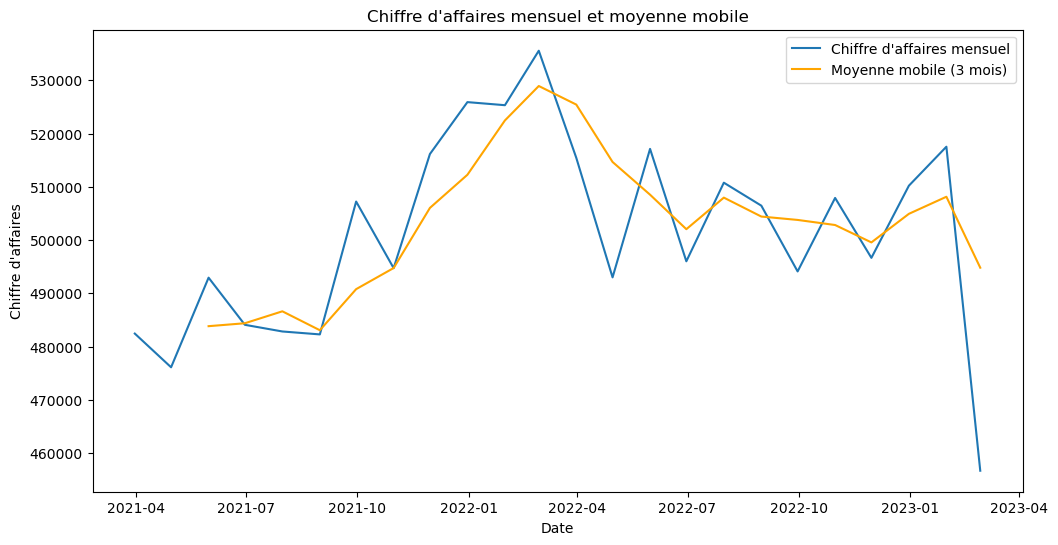

In [16]:
# Moyenne mobile
df_merge['date'] = pd.to_datetime(df_merge['date'])

df = df_merge.copy()
ventes_par_mois = df.resample('M', on='date')['price'].sum().reset_index()
ventes_par_mois.rename(columns={'price': 'total_sales'}, inplace=True)

ventes_par_mois['moyenne'] = ventes_par_mois['total_sales'].rolling(window=3).mean()


plt.figure(figsize=(12, 6))
plt.plot(ventes_par_mois['date'], ventes_par_mois['total_sales'], label='Chiffre d\'affaires mensuel')
plt.plot(ventes_par_mois['date'], ventes_par_mois['moyenne'], label='Moyenne mobile (3 mois)', color='orange')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires mensuel et moyenne mobile')
plt.legend()
plt.show()

   Categorie  Chiffre d'affaire
0          0         4419730.97
1          1         4827657.11
2          2         2780275.02


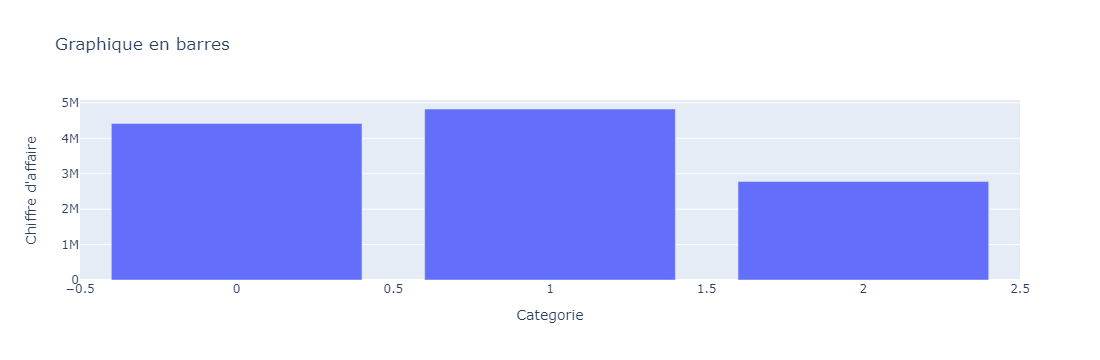

In [17]:
#chiffre d’affaires par catégorie,
df_ca_categ = df_merge[['price', 'categ']]
df_ca_categ = df_ca_categ.groupby('categ').sum().reset_index()
df_ca_categ = df_ca_categ.rename(columns={'categ' : 'Categorie','price' : 'Chiffre d\'affaire'})
print(df_ca_categ)

fig = px.bar(df_ca_categ, x='Categorie', y='Chiffre d\'affaire', title='Graphique en barres')
fig.show()

    Année  Mois  Clients
0    2021     3     5676
1    2021     4     5674
2    2021     5     5644
3    2021     6     5659
4    2021     7     5672
5    2021     8     5642
6    2021     9     5693
7    2021    10     6190
8    2021    11     5875
9    2021    12     5867
10   2022     1     5809
11   2022     2     5729
12   2022     3     5835
13   2022     4     5695
14   2022     5     5843
15   2022     6     5717
16   2022     7     5778
17   2022     8     5805
18   2022     9     5738
19   2022    10     5755
20   2022    11     5749
21   2022    12     5765
22   2023     1     5828
23   2023     2     5587


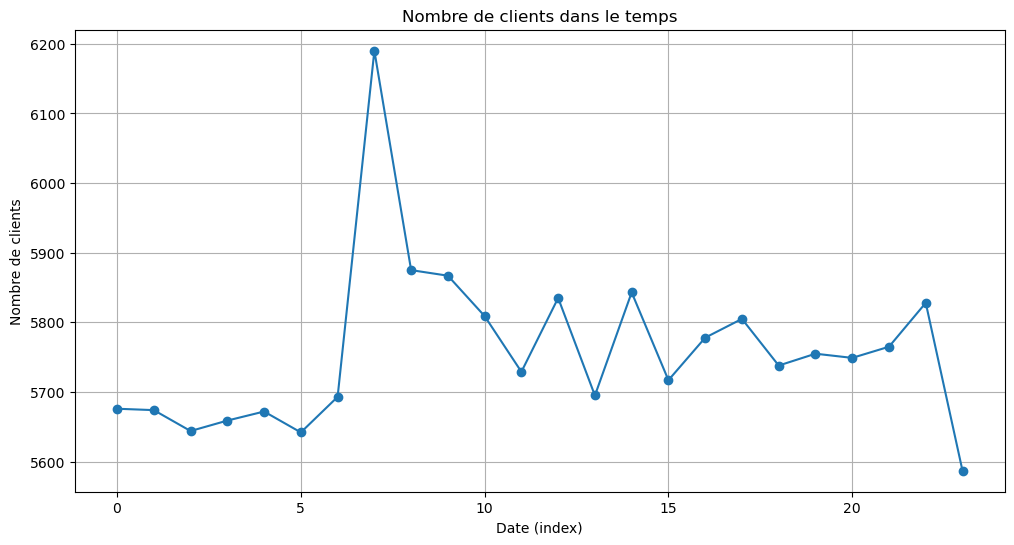

In [52]:
#Nombre de clients par mois,
df_client = df_merge.copy()
df_client['mois'] = df_client['date'].dt.month
df_client['année'] = df_client['date'].dt.year

df_client = df_client.groupby(['année', 'mois'])['client_id'].nunique().reset_index()

df_client.columns = ['Année', 'Mois', 'Clients']
print(df_client)

plt.figure(figsize=(12, 6))
plt.plot(df_client.index,df_client['Clients'], marker='o', linestyle='-')
plt.xlabel('Date (index)')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients dans le temps')
plt.grid(True)
plt.show()

In [19]:
#nombre de transactions,
df_transactions = df_merge.copy()
df_transactions['Mois'] = df_transactions['date'].dt.month
df_transactions['Année'] = df_transactions['date'].dt.year

transactions_temp = df_transactions.groupby(['Année', 'Mois']).size().reset_index(name='Nombre de transactions')
print(transactions_temp)
transactions_temp = transactions_temp.sort_values(by=['Année', 'Mois'])

    Année  Mois  Nombre de transactions
0    2021     3                   28601
1    2021     4                   28443
2    2021     5                   28285
3    2021     6                   26850
4    2021     7                   24738
5    2021     8                   25650
6    2021     9                   33314
7    2021    10                   30022
8    2021    11                   28311
9    2021    12                   32457
10   2022     1                   29343
11   2022     2                   29594
12   2022     3                   29696
13   2022     4                   27602
14   2022     5                   29975
15   2022     6                   28504
16   2022     7                   28670
17   2022     8                   28544
18   2022     9                   28306
19   2022    10                   28964
20   2022    11                   28563
21   2022    12                   28619
22   2023     1                   28938
23   2023     2                   25545


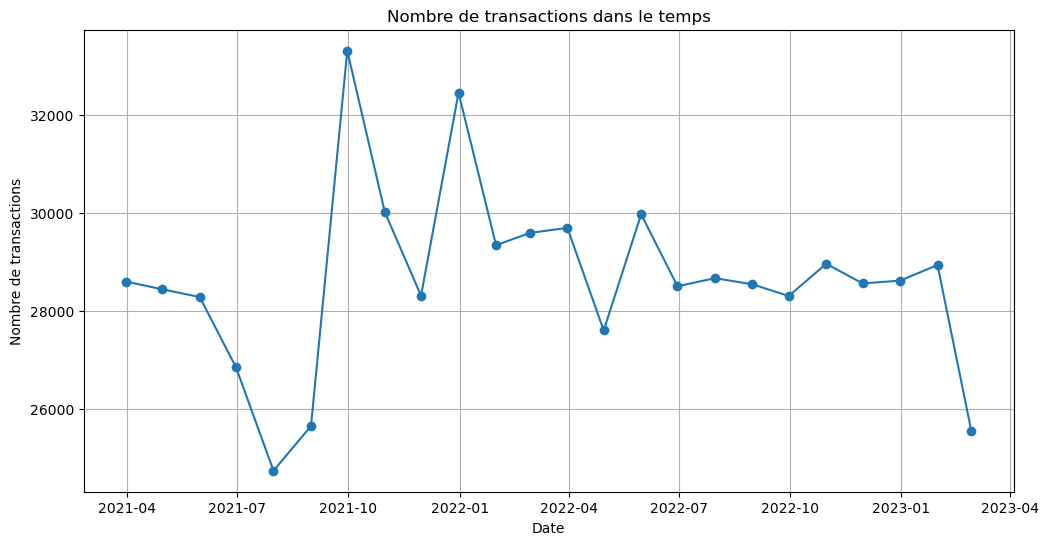

In [20]:
#nombre de transactions (graphique),
nb_transaction = df_merge.copy()
nb_transaction = nb_transaction.resample('M', on='date').size()

plt.figure(figsize=(12, 6))
plt.plot(nb_transaction.index, nb_transaction, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions dans le temps')
plt.grid(True)
plt.show()

In [21]:
#nombre de produits vendus,
df_produits_vendus = df_merge.copy()
produits_vendus_total = df_produits_vendus.groupby('id_prod').size().reset_index(name='Nombre de produits vendus')
produits_vendus_total

id_prod  Nombre de produits vendus
0        0_0                       1242
1        0_1                        487
2       0_10                         22
3      0_100                          3
4     0_1000                        432
...      ...                        ...
3260    2_95                          4
3261    2_96                        598
3262    2_97                         13
3263    2_98                          1
3264    2_99                          7

[3265 rows x 2 columns]

### Etape 2 : Il serait également intéressant de faire un zoom sur les références :

     client_id sex  Chiffre d'affaire
634     c_1570   f            5285.82
2513    c_3263   f            5276.87
1268    c_2140   f            5260.18
2108    c_2899   f            5214.05
7006    c_7319   f            5155.77
7715    c_7959   f            5135.75
470     c_1422   f            5131.36
7120    c_7421   m            5097.18
7791    c_8026   m            5082.58
1673    c_2505   f            5059.35


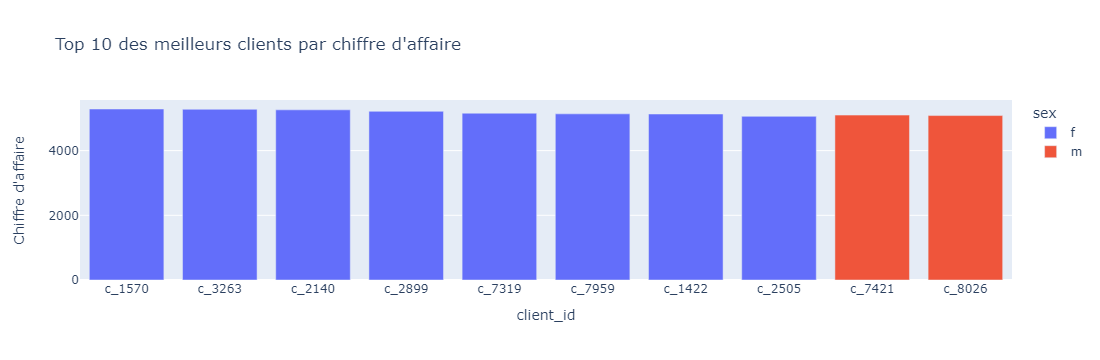

In [22]:
#les tops,
df_top_clients = pd.DataFrame(df_merge)
df_top_clients = df_top_clients[['client_id', 'price', 'sex']]
df_top_clients = df_top_clients.groupby(['client_id', 'sex']).sum().reset_index()
df_top_clients = df_top_clients.sort_values(by='price', ascending=False)
df_top_clients = df_top_clients.rename(columns={'price':'Chiffre d\'affaire'})

df_top_4_clients = df_top_clients.head(4)
df_top_clients = df_top_clients[~df_top_clients['client_id'].isin(df_top_4_clients['client_id'])]
df_top_clients = df_top_clients.head(10)
print(df_top_clients)

fig_top_client = px.bar(df_top_clients, x='client_id', y='Chiffre d\'affaire', color='sex', title='Top 10 des meilleurs clients par chiffre d\'affaire')
fig_top_client.show()

     id_prod  Chiffre d'affaire
3096   2_159           94893.50
3070   2_135           69334.95
3045   2_112           65407.76
3034   2_102           60736.78
3152   2_209           56971.86
2619   1_395           56617.47
2591   1_369           56136.60
3043   2_110           53846.25
2607   1_383           53834.43
2641   1_414           53522.18


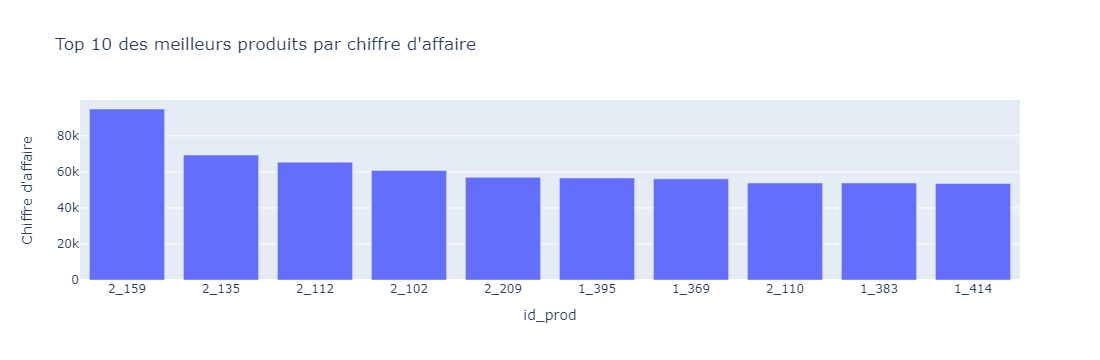

In [23]:
#top 10 des meilleurs produits
df_top_produits = pd.DataFrame(df_merge)
df_top_produits = df_top_produits[['id_prod', 'price']]
df_top_produits = df_top_produits.groupby(['id_prod']).sum().reset_index()
df_top_produits = df_top_produits.sort_values(by='price', ascending=False).head(10)
df_top_produits = df_top_produits.rename(columns={'price':'Chiffre d\'affaire'}, inplace=False)
print(df_top_produits)
fig_top_produit = px.bar(df_top_produits, x='id_prod', y='Chiffre d\'affaire', title='Top 10 des meilleurs produits par chiffre d\'affaire')
fig_top_produit.show()

     id_prod  Chiffre d'affaire
595   0_1539               0.99
313   0_1284               1.38
719   0_1653               1.98
1784   0_541               1.99
665   0_1601               1.99
2079   0_807               1.99
802   0_1728               2.27
549   0_1498               2.48
2179   0_898               2.54
925   0_1840               2.56


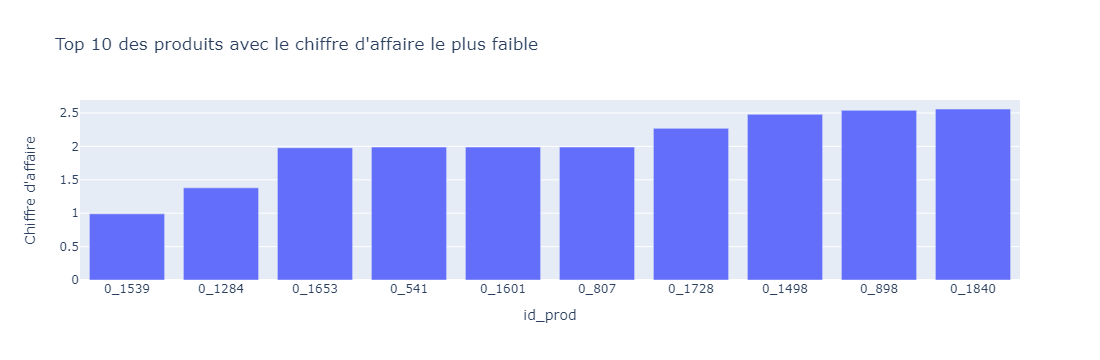

In [24]:
#Les flops,
# Top 10 des produits avec le chiffre d'affaire le plus bas
df_flop_produits = pd.DataFrame(df_merge)
df_flop_produits = df_flop_produits[['id_prod', 'price']]
df_flop_produits = df_flop_produits.groupby(['id_prod']).sum().reset_index()
df_flop_produits = df_flop_produits.sort_values(by='price', ascending=True).head(10)
df_flop_produits = df_flop_produits.rename(columns={'price':'Chiffre d\'affaire'})
print(df_flop_produits)
fig_flop_produit = px.bar(df_flop_produits, x='id_prod', y='Chiffre d\'affaire', title='Top 10 des produits avec le chiffre d\'affaire le plus faible')
fig_flop_produit.show()

   categ  Nombre de transactions
0      0                  415459
1      1                  235592
2      2                   36483


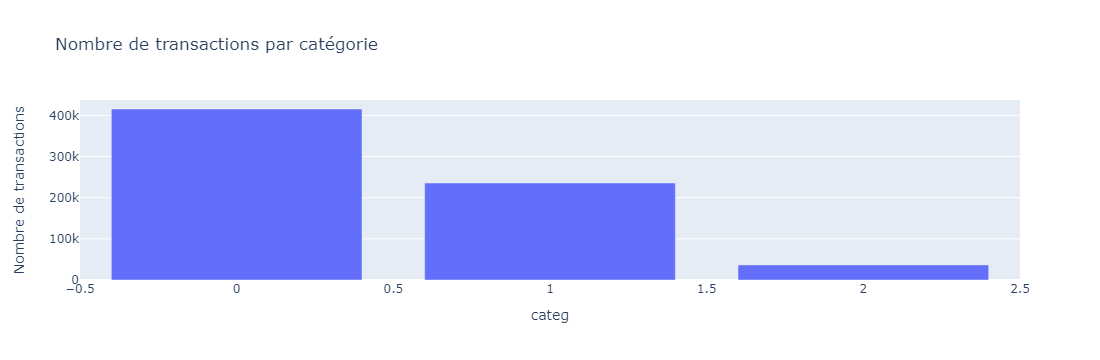

In [25]:
#la répartition par catégorie,
df_repartition = df_merge.copy()
df_repartition = df_repartition.groupby('categ').size().reset_index(name='Nombre de transactions')
print(df_repartition)

fig_repartition = px.bar(df_repartition, x='categ', y='Nombre de transactions', title='Nombre de transactions par catégorie')
fig_repartition.show()

#diagramme en secteur

## Analyse ciblée sur les clients

### Etape 1 : Analyse des informations sur les profils de nos clients afin de comprendre leurs comportements

     client_id  Chiffre d'affaire
677     c_1609          326039.89
4388    c_4958          290227.03
6337    c_6714          153918.60
2724    c_3454          114110.57


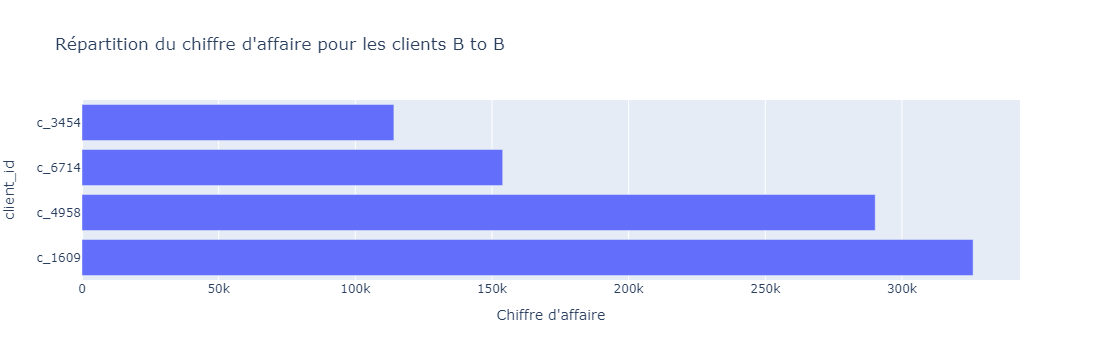

Hypothèse : Nous remarquons que 4 clients rapporte un chiffre d'affaire considérablement supérieur que les autres clients. Les chiffres d'affaires par clients varient autour de quelques centaines voir quelques milliers d'euros. On remarque en revanche que le chiffre d'affaire pour ces 4 clients uniquement varient autour de centaines de milliers d'euros. Nous pouvons donc considérer que ceux sont des clients professionnels.


In [26]:
#répartition du chiffre d'affaires pour les clients BtoB,

# Commencer par reperer les 4 clients atypique BtoB
client_btob = pd.DataFrame(df_merge)
client_btob = client_btob.groupby('client_id')['price'].sum().reset_index()
client_btob = client_btob.sort_values(by='price', ascending=False)
client_btob = client_btob.rename(columns={'price':'Chiffre d\'affaire'})
client_btob = client_btob.head(4)
print(client_btob)

fig = px.bar(client_btob, x='Chiffre d\'affaire', y='client_id', title='Répartition du chiffre d\'affaire pour les clients B to B')
fig.show()

print('Hypothèse : Nous remarquons que 4 clients rapporte un chiffre d\'affaire considérablement supérieur que les autres clients. Les chiffres d\'affaires par clients varient autour de quelques centaines voir quelques milliers d\'euros. On remarque en revanche que le chiffre d\'affaire pour ces 4 clients uniquement varient autour de centaines de milliers d\'euros. Nous pouvons donc considérer que ceux sont des clients professionnels.')


###

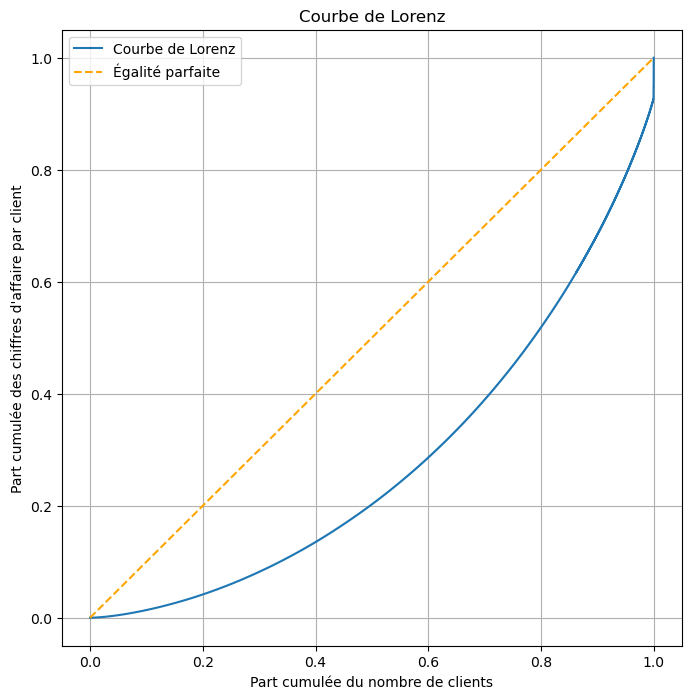

In [27]:
# Courbe de lorenz
lorenz = df_merge.copy()
lorenz = lorenz[['client_id', 'price']]
lorenz = lorenz.groupby('client_id').sum().reset_index()
lorenz = lorenz.sort_values(by='price')
lorenz['cumsum'] = lorenz['price'].cumsum()
total_price = lorenz['price'].sum()
lorenz['cumsum_pourcent'] = lorenz['cumsum'] / total_price

lorenz['clients_cumsum_prop'] = np.arange(1, len(lorenz) + 1) / len(lorenz)
lorenz_curve = pd.DataFrame({
    'clients_cumsum_prop': [0] + list(lorenz['clients_cumsum_prop']),
    'cumsum_pourcent': [0] + list(lorenz['cumsum_pourcent'])
})

# Graphique de la courbe de Lorenz
plt.figure(figsize=(8, 8))
plt.plot(lorenz_curve['clients_cumsum_prop'], lorenz_curve['cumsum_pourcent'], drawstyle='steps-post', label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], color='orange', linestyle='--', label='Égalité parfaite')
plt.xlabel('Part cumulée du nombre de clients')
plt.ylabel('Part cumulée des chiffres d\'affaire par client')
plt.title('Courbe de Lorenz')
plt.legend()
plt.grid(True)
plt.show()


# Réaliser des tests statistiques sur une masse de données afin de tester et valider des hypothèses

## Analyses statistiques

In [29]:
#Retirer les 4 clients atypique pour la suite des analyses
clients_to_remove = ['c_1609', 'c_4958', 'c_6714', 'c_3454']
df = df_merge.drop(df_merge[df_merge['client_id'].isin(clients_to_remove)].index)
df

id_prod                       date session_id client_id sex  birth  \
0       0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f   1967   
1       0_1390 2021-03-01 00:02:26.047414        s_2     c_664   m   1960   
2       0_1352 2021-03-01 00:02:38.311413        s_3     c_580   m   1988   
3       0_1458 2021-03-01 00:04:54.559692        s_4    c_7912   f   1989   
4       0_1358 2021-03-01 00:05:18.801198        s_5    c_2033   f   1956   
...        ...                        ...        ...       ...  ..    ...   
687529   1_508 2023-02-28 23:49:03.148402   s_348444    c_3573   f   1996   
687530    2_37 2023-02-28 23:51:29.318531   s_348445      c_50   f   1994   
687531   1_695 2023-02-28 23:53:18.929676   s_348446     c_488   f   1985   
687532  0_1547 2023-02-28 23:58:00.107815   s_348447    c_4848   m   1953   
687533  0_1398 2023-02-28 23:58:30.792755   s_348435    c_3575   f   1981   

        price  categ  
0       11.99      0  
1       19.37      0  
2        4.50      0  
3        6.55      0  
4       16.49      0  
...       ...    ...  
687529  21.92      1  
687530  48.99      2  
687531  26.99      1  
687532   8.99      0  
687533   4.52      0  

[640734 rows x 8 columns]

#### Les corrélations

categ       0       1      2
sex                         
f      200793  115721  16980
m      186488  104884  15868

Chi²: 22.66856665178056, p-value: 1.1955928116587024e-05, Degré de liberté: 2

Expected frequencies:
[[201574.89662481 114822.13191434  17096.97146086]
 [185706.10337519 105782.86808566  15751.02853914]]

Il existe une relation significative entre le genre et la catégorie de livre acheté (p < 0.05).



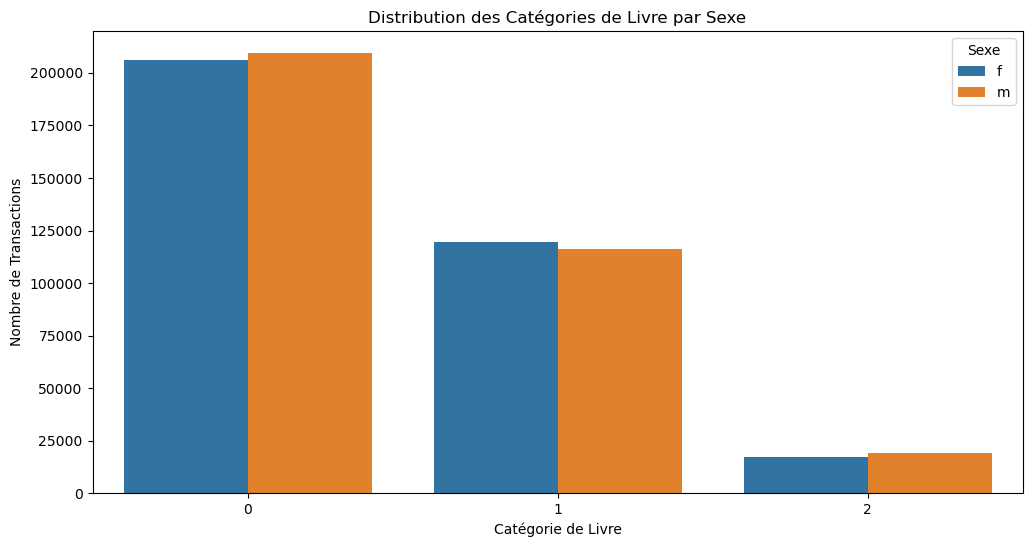

In [30]:
# Corrélation entre le genre et la catégorie de livre acheté
# Test Khi2
corr1 = pd.crosstab(df['sex'], df['categ'])
print(corr1)
print()
chi2, p, dof, expected = chi2_contingency(corr1)

# Afficher les résultats
print(f"Chi²: {chi2}, p-value: {p}, Degré de liberté: {dof}")
print()
print("Expected frequencies:")
print(expected)

# Interprétation des résultats
if p < 0.05:
    print()
    print("Il existe une relation significative entre le genre et la catégorie de livre acheté (p < 0.05).")
else:
    print()
    print("Il n'existe pas de relation significative entre le genre et la catégorie de livre acheté (p >= 0.05).")
print()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_merge, x='categ', hue='sex')
plt.title('Distribution des Catégories de Livre par Sexe')
plt.xlabel('Catégorie de Livre')
plt.ylabel('Nombre de Transactions')
plt.legend(title='Sexe')
plt.show()

Coefficient de corrélation de Pearson: -0.18756654332685188
p-value: 6.663511559771716e-69
Il existe une corrélation significative entre l'âge et le total des achats (p < 0.05).



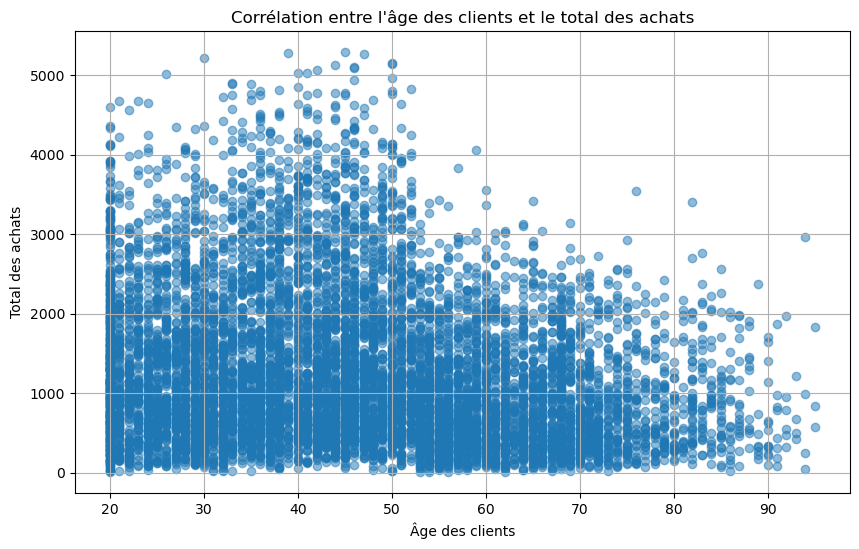

In [31]:
# Corrélation entre l'âge des clients et le total des achats
# test correlation entre les 2 variable (Pearson)
df = pd.DataFrame(df)
current_year = pd.to_datetime('today').year
df['age'] = current_year - df['birth']

# Calcul du total des achats par client
total_purchases = df.groupby('client_id')['price'].sum().reset_index()
total_purchases.columns = ['client_id', 'total_purchases']

# Joindre l'âge des clients au DataFrame du total des achats
df_age = df[['client_id', 'age']].drop_duplicates()
df_combined = pd.merge(total_purchases, df_age, on='client_id')

# Calcul de la corrélation de Pearson
corr, p_value = pearsonr(df_combined['age'], df_combined['total_purchases'])
print(f"Coefficient de corrélation de Pearson: {corr}")
print(f"p-value: {p_value}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il existe une corrélation significative entre l'âge et le total des achats (p < 0.05).")
else:
    print("Il n'existe pas de corrélation significative entre l'âge et le total des achats (p >= 0.05).")

print()
# Tracer le scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['age'], df_combined['total_purchases'], alpha=0.5)
plt.xlabel('Âge des clients')
plt.ylabel('Total des achats')
plt.title('Corrélation entre l\'âge des clients et le total des achats')
plt.grid(True)
plt.show()

# corrélation négatve ou positive ? commentaire

Coefficient de corrélation de Pearson: 0.030327901870329868
p-value: 0.004922261715831482
Il existe une corrélation significative entre l'âge et la fréquence d'achat (p < 0.05).



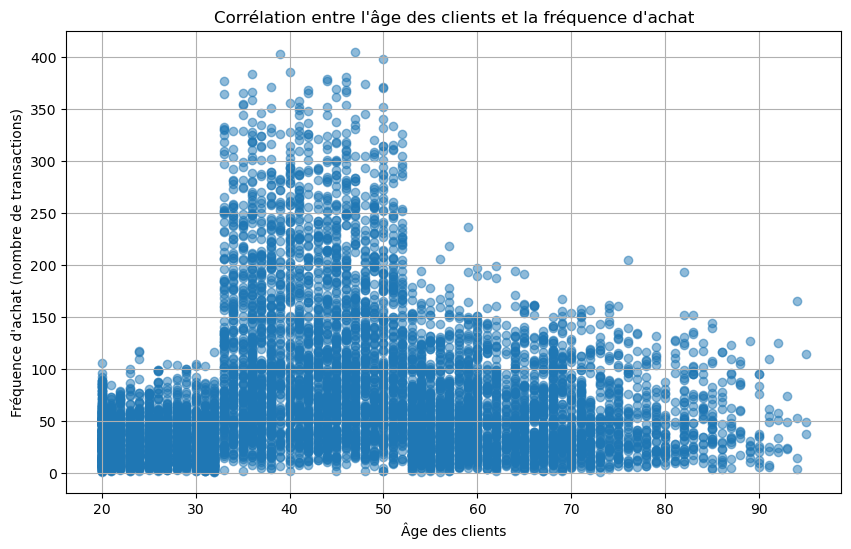

In [32]:
# Corrélation entre l'âge des clients et la frequence d'achat
#Test de Pearson
df = pd.DataFrame(df)

# Calcul de l'âge des clients
current_year = pd.to_datetime('today').year
df['age'] = current_year - df['birth']

# Calcul du nombre de transactions par client (fréquence d'achat)
transaction_counts = df.groupby('client_id')['price'].count().reset_index()
transaction_counts.columns = ['client_id', 'transaction_count']

# Joindre l'âge des clients au DataFrame de la fréquence d'achat
df_age = df[['client_id', 'age']].drop_duplicates()
df_combined = pd.merge(transaction_counts, df_age, on='client_id')

# Calcul de la corrélation de Pearson
corr, p_value = pearsonr(df_combined['age'], df_combined['transaction_count'])
print(f"Coefficient de corrélation de Pearson: {corr}")
print(f"p-value: {p_value}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il existe une corrélation significative entre l'âge et la fréquence d'achat (p < 0.05).")
else:
    print("Il n'existe pas de corrélation significative entre l'âge et la fréquence d'achat (p >= 0.05).")
print()

# Tracer le scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['age'], df_combined['transaction_count'], alpha=0.5)
plt.xlabel('Âge des clients')
plt.ylabel('Fréquence d\'achat (nombre de transactions)')
plt.title('Corrélation entre l\'âge des clients et la fréquence d\'achat')
plt.grid(True)
plt.show()

Coefficient de corrélation de Pearson: -0.5105290328181462
p-value: 0.0
Il existe une corrélation significative entre l'âge et le panier moyen (p < 0.05).



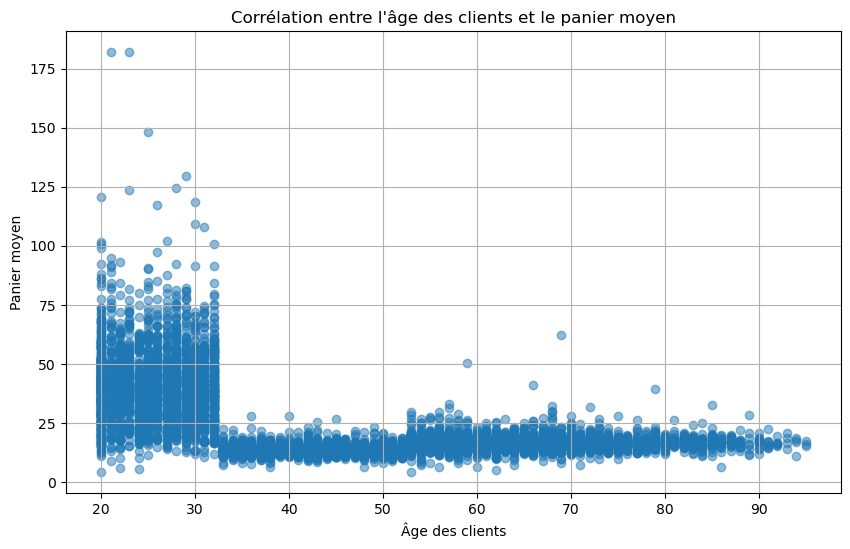

In [33]:
#Corrélation entre l'age et le panier moyen
# Test de Pearson
df = pd.DataFrame(df)

# Calcul de l'âge des clients
current_year = pd.to_datetime('today').year
df['age'] = current_year - df['birth']

# Calcul du total des achats et du nombre de transactions par client
total_purchases = df.groupby('client_id')['price'].sum().reset_index()
transaction_counts = df.groupby('client_id')['price'].count().reset_index()

# Calcul du panier moyen par client
total_purchases.columns = ['client_id', 'total_purchases']
transaction_counts.columns = ['client_id', 'transaction_count']
client_data = pd.merge(total_purchases, transaction_counts, on='client_id')
client_data['average_basket'] = client_data['total_purchases'] / client_data['transaction_count']

# Joindre l'âge des clients au DataFrame du panier moyen
df_age = df[['client_id', 'age']].drop_duplicates()
df_combined = pd.merge(client_data, df_age, on='client_id')

# Calcul de la corrélation de Pearson
corr, p_value = pearsonr(df_combined['age'], df_combined['average_basket'])
print(f"Coefficient de corrélation de Pearson: {corr}")
print(f"p-value: {p_value}")

# Interprétation des résultats
if p_value < 0.05:
    print("Il existe une corrélation significative entre l'âge et le panier moyen (p < 0.05).")
else:
    print("Il n'existe pas de corrélation significative entre l'âge et le panier moyen (p >= 0.05).")
print()

# Tracer le scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['age'], df_combined['average_basket'], alpha=0.5)
plt.xlabel('Âge des clients')
plt.ylabel('Panier moyen')
plt.title('Corrélation entre l\'âge des clients et le panier moyen')
plt.grid(True)
plt.show()

categ           0      1      2
age_group                      
20-29       13365  23616  23630
30-39      105507  38700   6763
40-49      157479  51264    754
50-59       65377  46917    743
60+         45553  60108    958

Chi2: 209615.22101896504
p-value: 0.0
Degrees of freedom: 8

Expected frequencies:
[[ 36635.30995858  20868.3941464    3107.29589502]
 [ 91251.30330215  51979.03786907   7739.65882878]
 [126626.97415308  72129.9098924   10740.11595451]
 [ 68323.33292287  38918.68916742   5794.97790971]
 [ 64444.07966332  36708.9689247    5465.95141197]]

Il existe une corrélation significative entre les tranches d'âge et les catégories de livres (p < 0.05).



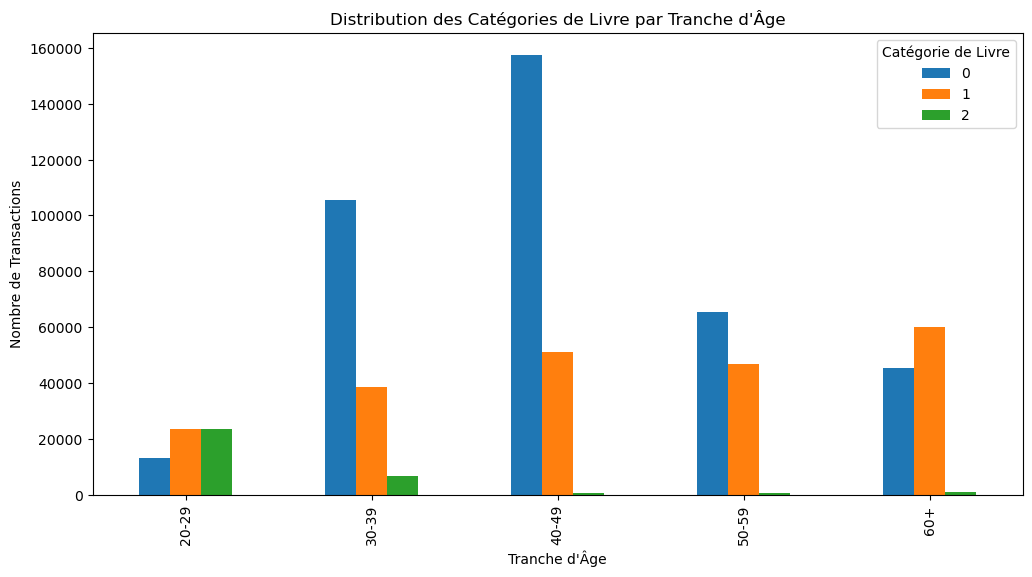

In [36]:
#Corrélation entre l'age et la catégorie de livre acheté
# Test du Khi 2
df = pd.DataFrame(df)

# Calcul de l'âge des clients
current_year = pd.to_datetime('today').year
df['age'] = current_year - df['birth']

# Créer des tranches d'âge
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Créer la table de contingence
contingency_table = pd.crosstab(df['age_group'], df['categ'])
print(contingency_table)

# Appliquer le test du chi-carré
chi2, p, dof, ex = chi2_contingency(contingency_table)
print()
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print()
print("Expected frequencies:")
print(ex)

# Interprétation des résultats
if p < 0.05:
    print()
    print("Il existe une corrélation significative entre les tranches d'âge et les catégories de livres (p < 0.05).")
else:
    print()
    print("Il n'existe pas de corrélation significative entre les tranches d'âge et les catégories de livres (p >= 0.05).")
print()

# Visualisation - Stacked Bar Plot
contingency_table.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Distribution des Catégories de Livre par Tranche d\'Âge')
plt.xlabel('Tranche d\'Âge')
plt.ylabel('Nombre de Transactions')
plt.legend(title='Catégorie de Livre')
plt.show()

# corrélation (non association)

####